# <center><font color='green'>NYC GREEN TAXI ANALYSIS</font></center>
<img src='http://www.nyc.gov/html/tlc/images/features/fi_passenger_information_shl_passenger.jpg', height=300, width=500></center>
<br>
For this data challenge, I shall be making use of a jupyter ipython notebook in which I will be making use of libraries within python like pandas, numpy, scikit-learn, matplotlib, seaborn in order to perform data analysis of the given dataset for NYC green taxi trips for the month of September 2015. 

## TABLE OF CONTENTS
### 1. Importing the data file
### 2.1 Plot a histogram of Trip_distance
### 3.1 Report mean and median trip distance grouped by hour of day
### 3.2 Airport Trips & their charecteristics
### 4.1 Build a derived variable for tip as a percentage of the total fare
### 4.2 Build a predictive model for tip as a percentage of the total fare
### Recommendations
### 5.A Distributions
### Predict using another Month's dataset

## 1. Importing the data file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

In [2]:
taxiData = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv')

In [3]:
print('The loaded dataset has', taxiData.shape[0], 'rows and', taxiData.shape[1], 'feautres within it.')

The loaded dataset has 1494926 rows and 21 feautres within it.


In [4]:
taxiData.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


It is always good practise to perform a describe on your dataset in order to get an initial sense of the various numerical features within the dataset. Now that this is done in the next step I will be applying some basic functions to some features within the dataset. It was noted that the Ehail_fee feature doesnt have any data and is conatining null values, as a result it was dropped. Also, only trips having distance of greater than 0.0 miles and having a Fare_amount of greater than 0 were considered. 

Other than that, no variables have been dropped so far. It was noted that there exist some negative values in feilds like Fare Amount, Tip Amount etc. These charges cannot be negative and hence, I considered theor absolute value instead of dropping these rows altogether. Dropping rows should always be considered as a last alternative, owing to loss of potentially valid information. 

Also, the features containing pickup and dropoff datetime were converted to a datetime format so that I can extract various features like month, day etc. from them with greater ease.  

In [5]:
taxiData.drop('Ehail_fee', axis=1, inplace=True)
#taxiData =  taxiData[(taxiData['Fare_amount'] > 0) & (taxiData['Extra'] > 0) & (taxiData['MTA_tax'] > 0) & (taxiData['Tip_amount'] > 0) & (taxiData['Tolls_amount'] > 0) & (taxiData['improvement_surcharge'] > 0) & (taxiData['Total_amount'] > 0)]

taxiData['Fare_amount'] = taxiData['Fare_amount'].apply(lambda x: abs(x))
taxiData['Extra'] = taxiData['Extra'].apply(lambda x: abs(x))
taxiData['MTA_tax'] = taxiData['MTA_tax'].apply(lambda x: abs(x))
taxiData['Tip_amount'] = taxiData['Tip_amount'].apply(lambda x: abs(x))
taxiData['Tolls_amount'] = taxiData['Tolls_amount'].apply(lambda x: abs(x))
taxiData['improvement_surcharge'] = taxiData['improvement_surcharge'].apply(lambda x: abs(x))
taxiData['Total_amount'] = taxiData['Total_amount'].apply(lambda x: abs(x))

#changed fare amuont to total amount
taxiData = taxiData[(taxiData['Trip_distance']>0) & taxiData['Total_amount']>0]

In [6]:
taxiData['lpep_pickup_datetime'] = pd.to_datetime(taxiData['lpep_pickup_datetime'])
taxiData['Lpep_dropoff_datetime'] = pd.to_datetime(taxiData['Lpep_dropoff_datetime'])

## 2.1 Plot a histogram of Trip_distance

The next problem at hand is to plot a histogram for the trip distance within the dataset. For this, firstly I created two plots the one on the left hand showing the histogram of trip distances, and then the plot on the right hand side showing us a scatter plot of the same data i.e. the trip distances. 

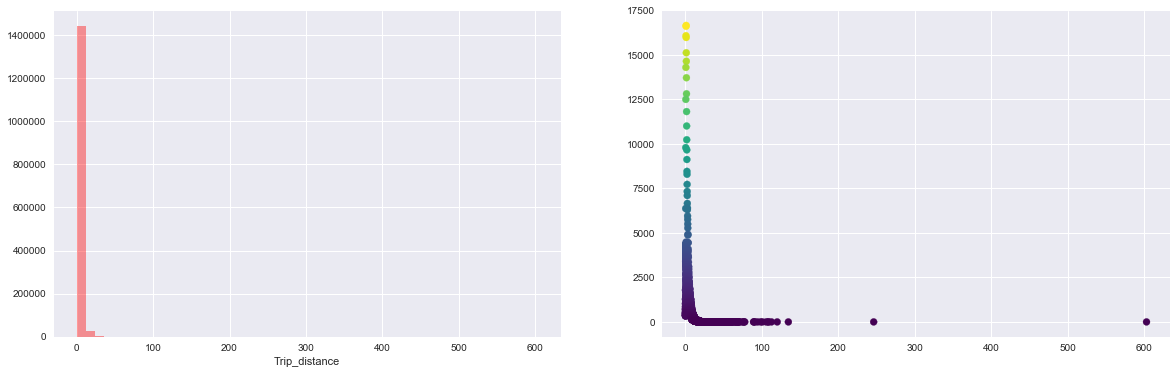

In [7]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
hist = sns.distplot(taxiData['Trip_distance'], kde=False, color='red', rug=False)
plt.title = 'Histogram for Trip Duration'
plt.subplot(1,2,2)
value_counted = pd.DataFrame(taxiData['Trip_distance'].value_counts()).reset_index()
plt.xlabel='Trip Distance'
plt.ylabel='Count of Trips'
plt.title = 'Scatter Plot Showing the Count of Trip Distance'
plt.scatter(x=value_counted['index'], y=value_counted['Trip_distance'], c=value_counted['Trip_distance'], cmap='viridis')


The reason I chose to approach this visualization in two different ways is to ensure that there is some data present in the ranges above 15 miles. As we can see that in the histogram there are no visible bars after the first two values. This can cause confusion about the values ahead as they are not visible. The scatter plot on the other hand proves to us the presence of some extraneous values and confirms suspicion that we will need to perform some operations on the dataset in order to deal with these outlier values. 

In [8]:
#counts = pd.cut(taxiData['Trip_distance'], bins=10).value_counts()
#taxiCounts = pd.DataFrame(counts)
#taxiCounts

In order to deal with the outlier values, I decided to drop all those values which were greater than <b>3 standard deviations</b> away from the mean value of the trip distanes. Once this operation is performed, we then plot the histogram and can now notice the trend within the trips by distance. The plot is made out using seaborn library for data visualization within python. It also includes a kernel density estimation line on top of the histogram. 

From the following visualization we can observe that the resulting distribution is a <b>log normal distribution</b> and not a normal/gaussian distribution, with most of the rides being less than <b>2 miles</b>. 

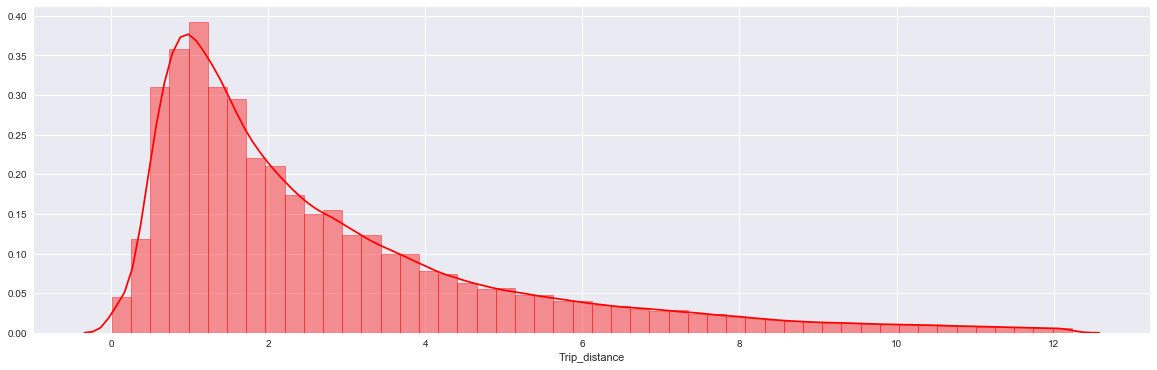

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,6))
taxiData = taxiData[((taxiData.Trip_distance - taxiData.Trip_distance.mean()) / taxiData.Trip_distance.std()).abs() < 3]
hist = sns.distplot(taxiData['Trip_distance'], color='red', hist_kws=dict(edgecolor="red", linewidth=1))

##  3.1 Report mean and median trip distance grouped by hour of day

The next task at had is to explore the mean and median trip distances grouped by the hour of the day the ride was started in. For this task, I firstly create two variables, <b>hour_of_pickup</b> and the <b>day_of_pickup</b> which I use later on. Once done, a simple groupby is done on the dataset and two dataframes are created using the two different aggregate functions i.e. Mean and Median. This was then visualized in two different formats as it can be seen below. 

The first visualization on the left hand side, is a simple plot of the mean and median value as compared to the hour of the day. Anther way of performing the same visualization is by making use of a heatmap, which has been illustrated on the right hand side. Heatmaps are much more engaging and give a much better sense of change in the data trend. 

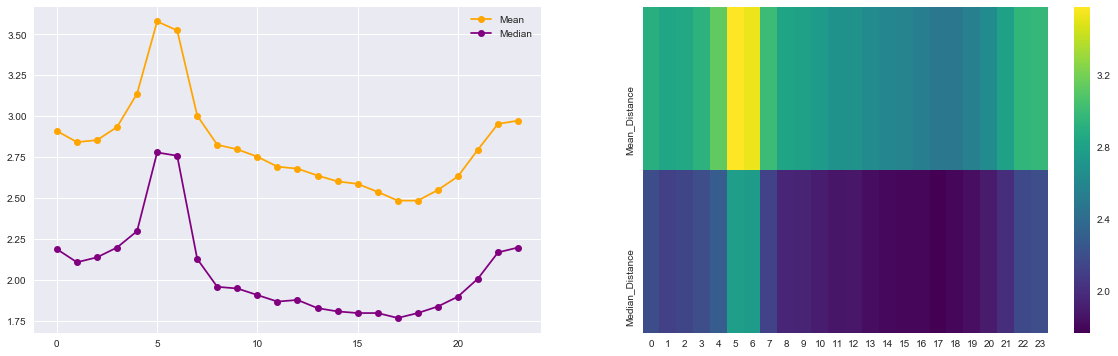

In [10]:
taxiData['hour_of_pickup'] = taxiData['lpep_pickup_datetime'].apply(lambda x: x.hour)
mean_distance = pd.DataFrame(taxiData.groupby('hour_of_pickup').mean().reset_index()[['Trip_distance','hour_of_pickup']])
median_distance = pd.DataFrame(taxiData.groupby('hour_of_pickup').median().reset_index()[['Trip_distance','hour_of_pickup']])
taxiData['day_of_pickup'] = taxiData['lpep_pickup_datetime'].apply(lambda x: x.dayofweek)
#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#taxiData['day_of_pickup'] = taxiData['day_of_pickup'].map(dmap)
mean_median = pd.merge(mean_distance, median_distance, left_on='hour_of_pickup', right_on='hour_of_pickup', how='inner').drop('hour_of_pickup', axis=1)
mean_median.columns = ['Mean_Distance','Median_Distance'] 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(np.arange(24), mean_distance['Trip_distance'], c='Orange', marker='o', label='Mean')
plt.plot(np.arange(24), median_distance['Trip_distance'], c='Purple', marker='o', label='Median')
plt.legend()
plt.subplot(1,2,2)
sns.heatmap(mean_median.transpose(), cmap='viridis')


As we can see from the visualizations above, we notice a spike in both the mean and median trip distances in a time frame of 5:00 am and 6:00 am. This can most probably be attributed to the increased trip rides by office commuters who are in a rush to reach to work. After this the mean trip distance decreases and then we see a gradual rise in them around 11:00 pm and 12:00 am. 

## 3.2 Airport Trips & their charecteristics

The next part requires us to observe any trends within Airport rides. Airport rides can be defined as any trip which is originating or terminating in either of the major airports in the NYC area. These can be found within the RateCodeID field. The data manual for the NYC taci data illustrates that the rate code 2 & 3 corresponds to airport rides for John F Kennedy Airport(JFK) and Newark Liberty International Airport(EWR) respectively. As there is no special airport fare valid for Laguardia Airport(LGA), we will not be considering it within our airport rides. 


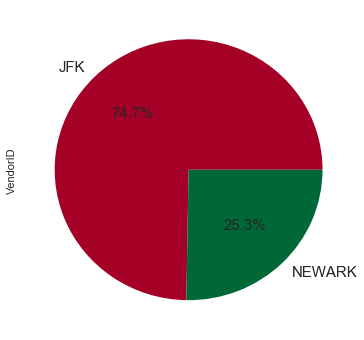

In [11]:
airportTrips = taxiData[(taxiData['RateCodeID'] == 2) | (taxiData['RateCodeID'] == 3)].copy()
def airport_fun(x):
    if x == 2:
        return "JFK"
    elif x == 3:
        return "NEWARK"
airportTrips['Airport'] = airportTrips['RateCodeID'].apply(airport_fun)
plt.figure(figsize=(6,6))
airportTrips.groupby('Airport').count()['VendorID'].plot.pie(colormap='RdYlGn', autopct='%1.1f%%', fontsize=15)
#plt.ylabel('')
#remove the vendorID from the pie chart


Using this pie chart I aim to get a sense of how many trips are being classififed as those going to JFK or to Newark airport. As expected, there are much more greater number of rides being taken from/to JFK than Newark. This can be attributed to the fact that firstly JFK handles more air traffic than Newark and also that there is a higher chance of people landing at Newark to be residing within New Jersey and not within New York, thus eliminatiing their need to hail a NYC taxi althogether. That being said, we can see there are still quite a sizeable number of people hailing green taxi's from/to Newark Airport. 

In [12]:
print('The Number of Airport Rides :',pd.DataFrame((taxiData['RateCodeID'] == 2) | (taxiData['RateCodeID'] == 3))['RateCodeID'].value_counts()[1])
print('The avg fare amount charged : $',airportTrips['Fare_amount'].mean())
print('The avg total amount including all other charges : $', airportTrips['Total_amount'].mean())
print('The avg. total distance for Airport rides:', airportTrips['Trip_distance'].mean())





The Number of Airport Rides : 1464
The avg fare amount charged : $ 46.033811475409834
The avg total amount including all other charges : $ 48.36688524590288
The avg. total distance for Airport rides: 1.6420901639344212


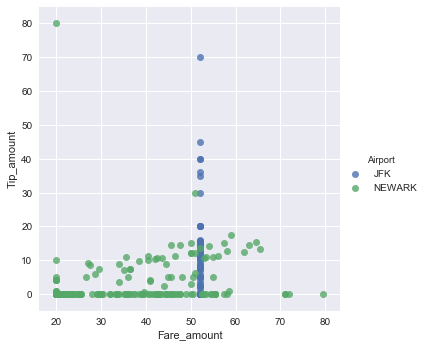

In [13]:
sns.lmplot(x='Fare_amount', y='Tip_amount', data=airportTrips, hue='Airport', fit_reg=False)


In [14]:
taxiData['Airport_trip'] = taxiData['RateCodeID'].apply(lambda x: 'AIRPORT' if (x==2 | x==3) else 'NON-AIRPORT')
taxiData['trip_duration'] = (taxiData.Lpep_dropoff_datetime - taxiData.lpep_pickup_datetime).apply(lambda x: x.total_seconds()/60)
taxiData['trip_duration'] = taxiData[taxiData['trip_duration']>0]
taxiData['trip_duration'] = pd.to_numeric(taxiData['trip_duration'])
taxiData['speed'] = taxiData.Trip_distance / taxiData.trip_duration
#taxiData['Avg_speed'] = taxiData.Trip_distance/taxiData.Trip
#pd.cut(taxiData[taxiData['Airport_trip']=='NON-AIRPORT']['Trip_distance'], bins=5).value_counts()


Above I added some new features to my dataset in order to explore various different aspects of airport trips. For this I created new features like whether it was an airport trip or not, the trip duration and the trip speed etc. Also, in the above plot we can notice the tipping behvior for JFK is much more different than that of Newark Airport. Also, that our dataset now includes much more flat fare rides for JFK as compared to Newark. I would reccomend to use a bounding box for the latitude and longitude of these airports as a future exercise in order to better pinpoint the airport rides and ensure that the ratecode id feature is being entered correctly. 

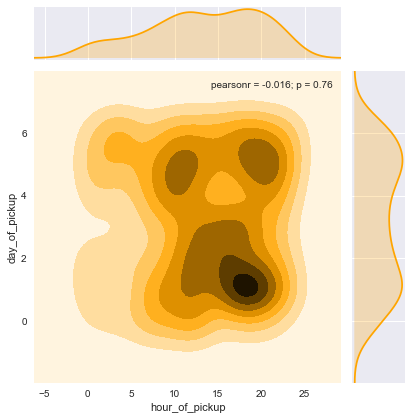

In [15]:
#sns.lmplot(x='speed', y='Tip_amount', data=taxiData, hue='Airport_trip')
sns.jointplot(x='hour_of_pickup', y='day_of_pickup', data=taxiData[taxiData['Airport_trip']=='AIRPORT'], kind='kde', color='orange')

In the above visualization I created a KDE plot for the hour of day vs the day of week in order to get a better insight into the behaviour of airport trip passengers. I particularly feel this plot is helpful to us since there are a lot of missing vlaues or less data for airport trips after data cleaning. Even below we can visualise the sheer dfferenc in the amount of trips for airport vs non airport rides and the difference in the variation between airport and non airport rides. 

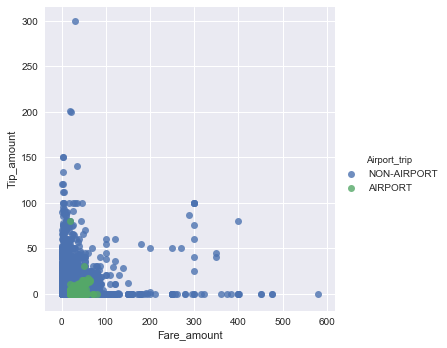

In [16]:
sns.lmplot(x='Fare_amount', y='Tip_amount', data=taxiData, hue='Airport_trip', fit_reg=False)

In [17]:
#taxiData_heat = taxiData.copy()
#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#taxiData_heat['day_of_pickup'] = taxiData_heat['day_of_pickup'].map(dmap)
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.heatmap(data = taxiData_heat[taxiData_heat['Airport_trip']=='AIRPORT'].groupby(['day_of_pickup','hour_of_pickup']).mean()['Tip_amount'].unstack().reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap='magma',vmin=0, vmax=5)
#plt.subplot(1,2,2)
#sns.heatmap(data = taxiData_heat[taxiData_heat['Airport_trip']=='NON-AIRPORT'].groupby(['day_of_pickup','hour_of_pickup']).mean()['Tip_amount'].unstack().reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap='magma')

The above code is used to generate two heatmaps which can be used to compare the average tip amount between Airport and Non-Airport trips. However, as we have performed extensive data cleaning the airport data especially JFK trips are severely affected as they had majority of the data beyond 3 standard deviations. Due to this the number of airport trips we have in the dataset is only 1464 after data cleaning. 

Due to this small size of airport data, we notice that there are a lot of empty gaps in the first heatmap depicting the Airport trips. I have commented out the above code, however it should be uncommented once we ingest enough data into our analysis so that we can have a representative population even after data cleaning. 

## 4.1 Build a derived variable for tip as a percentage of the total fare

The next task is to create a derived variable called tip percentage, which would indicate the tip as a percentage of the total fare amount. This can be simply done within as shown below. I have also, made various visualizations trying to see any trends within the newly created variable of Tip percent. 



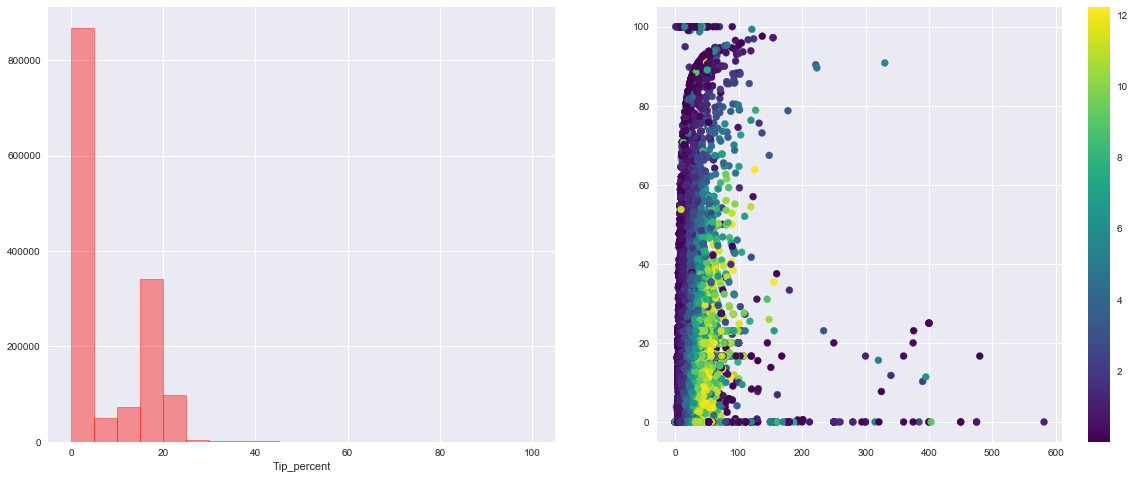

In [18]:
#taxiData = taxiData[taxiData['Total_amount']>0]
taxiData['Tip_percent'] = taxiData.Tip_amount/taxiData.Total_amount*100
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(taxiData['Tip_percent'], bins=20, kde=False, color='red', hist_kws=dict(edgecolor="red", linewidth=1))
plt.subplot(1,2,2)
plt.scatter(x=taxiData['Total_amount'], y=taxiData['Tip_percent'], c=taxiData['Trip_distance'], cmap='viridis')
plt.colorbar()


The above visualization on the left depicts a histogram of the tip_percent variable. This is indicating to us that majority of the trips have a lower tip percentage around 0-5% of the total amount. The visualization on the right is a scatter plot showing to us the trend within total amount and trip percentage. To this figure I have added another dimension by using the trip distance of the ride as the color of the marker. This will give us a good idea of the fact that whether a long ride had a high total amount and how much percent of that was given as tip. This shows us that for the high trip distances the tip percentage is spread between 0-40%. Whereas, most of the high tip percent come from short rides. Owing to the number of short rides, we see a very wide spread in the tip percentage for these rides which ranges from 0-100. Also, we note that as the total_cost kept going above $100, the tip percentage was less. 

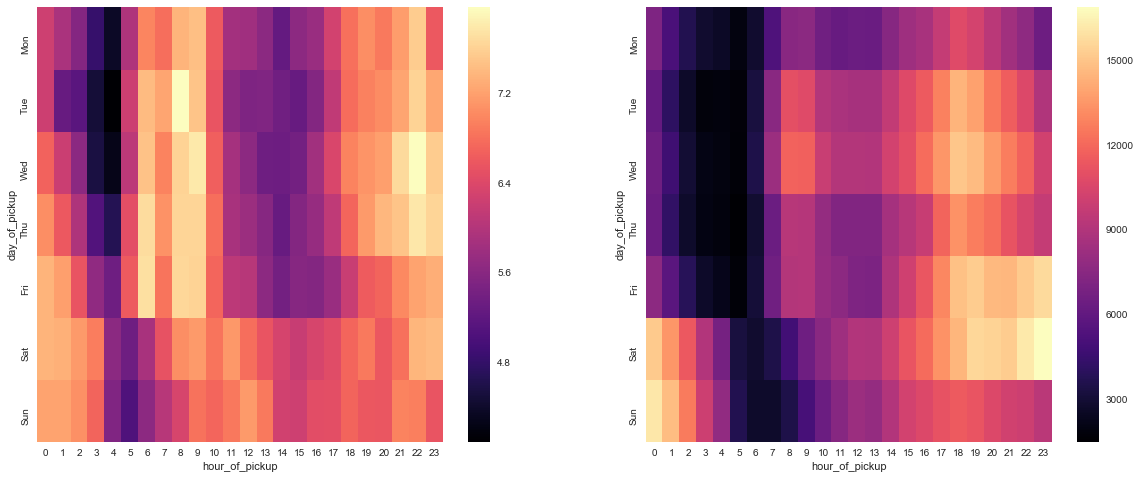

In [19]:
taxiData_heat = taxiData.copy()
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
taxiData_heat['day_of_pickup'] = taxiData_heat['day_of_pickup'].map(dmap)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(taxiData_heat.groupby(['day_of_pickup','hour_of_pickup']).mean()['Tip_percent'].unstack().reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap='magma')
plt.subplot(1,2,2)
sns.heatmap(taxiData_heat.groupby(['day_of_pickup','hour_of_pickup']).count()['Tip_percent'].unstack().reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap='magma')


I tried to also see whether there is any noticable effect of a particular day of the week and hour of the day on the tip percentage. In order to achieve this, I created two heatmaps as shown above. The one on the left shows the mean/average tip percentage for any given day of week and hour of day. Along with this the right hand side heatmap shows us the number of trips being taken in that same day of week and hour of day. 

My aim to explore both these heatmaps side by side, is to see whether I can notice some visible effect on the number of rides being taken and the mean tip being given. Such a comparison would be much more effective, if I would be able to compare the tip percent being given and the count of taxi rides originating from nearby from where the cab was hailed. However, for this project owing to time constraints, I will not be going into such a detailed and fine grained comparison.

But, form the above two heatmaps, we can notice that there is an increased tip percentage being given on Weekdays i.e. Monday-Friday from 6:00 am - 9:00 am. This might be attributed to the office crowd, also we see an increased tipping behaviour on Tuesday-Thursday in late trips from 9:00 pm - 12:00 am.   

Another interesting phenomenon I noticed within the tip_percentage and tips in general is that while comparing the tip percentage or tips in general against the payment type, we notice that customers paying via card are the ones who gave the most amount of tips, while the trips which were paid for by cash did not give any tip for the rides. Also, a majority of the rides are paid for by card and not using cash or any other means of payment. 

In [20]:
taxiData.groupby('Payment_type').mean()['Tip_percent']

Payment_type
1    14.166674
2     0.000128
3     0.030352
4     0.025863
5     0.000000
Name: Tip_percent, dtype: float64

In the above table, we see that as mentioned in the documentation for the dataset, 1 corresponds to Card payment, 2 for cash payment, 3 for No charge, 4 for dispute and 5 is for Unknown. The reasons on why the customers who paid via cash did not give any tip is worth questioning and can be studied further, however due to time contraints I will not be exploring it further within this analysis. However, this also presents us another problem that such a distribution makes the data highly skewed, as it won't have enough samples from all segments of the population. Namely, tip_percentages with payment method as cash, other etc. as 99% of the transactions within this dataset are made using a card. 

## 4.2 Build a predictive model for tip as a percentage of the total fare

As we saw previously, there is a major problem with the fare_amount variables and the tip_amount variables. This is mainly because of the fact that we have a large number of trips in which there is no fare and a huge tip attached with it. Also there are trips in which there is a very large fare amount like 600 dollars. I find this to be highly doubtful and as a result I will try to remove all those records in which the tip value is above 3 standard deviations from the mean. This seems to be the best way to handle outliers as of now. 

Also, we have various records which indicate that the fare_amount for the ride is 0 dollars even though it is accompanied by a huge tip. I will also attempt to remove such records and see how much of the dataset do they constitute.   

As while building any model I will follow the following steps while creating a predictive model for tip percent and total fare. 
<ol>
<li>The first and foremost step will be to clean the data loaded. 
<li>Then the data will be transformed with feature engineering and the validity of the various data charecteristics will be assesed. Appropriate actions will be taken as a result of it.
<li>Perform data exploration.
<li>Finally I shall fit the machine learning algorithm onto the training dataset which I will take as 70% of the dataset, keeping the other 30% for the test set. </ol>
Once the model is made, I shall perform predictions on it using the test set and evaluate metrics of the model to make sure of its statistical significance. If required parameter tuning will be done in order to make sure that the best fit can be found to perform predictions in the future. 

Even though I have performed some data cleaning and feature engineering in the previous steps in order to answer the previous questions, within the scope of this model I shall be doing all those steps again from scratch so that if a dataset is loaded onto it, all operations can be performed successfully. 

#### DATA LOADING

In [21]:
#Reading in the data for modelling
model_taxiData = pd.read_csv('green_tripdata_2015-09.csv')
print('Data is sucecssfully loaded into variable model_taxiData!')
rows = model_taxiData.shape[0]
print('The Data loaded has ', model_taxiData.shape[0] ,' rows of data & ' , model_taxiData.shape[1] , ' features in it.')

Data is sucecssfully loaded into variable model_taxiData!
The Data loaded has  1494926  rows of data &  21  features in it.


The feature Ehail_fee is not available for any of the rides, hence I decided to drop it altogether. Also, I have dropped the feature, Store_and_fwd_flag as i did not feel it will contribute to the tip_percentage calcualtion

#### DATA CLEANING

In [22]:
#Data Cleaning
model_taxiData.drop(['Ehail_fee','Store_and_fwd_flag'], axis=1, inplace=True)
model_taxiData['Fare_amount'] = model_taxiData['Fare_amount'].apply(lambda x: abs(x))
model_taxiData['Extra'] = model_taxiData['Extra'].apply(lambda x: abs(x))
model_taxiData['MTA_tax'] = model_taxiData['MTA_tax'].apply(lambda x: abs(x))
model_taxiData['Tip_amount'] = model_taxiData['Tip_amount'].apply(lambda x: abs(x))
model_taxiData['Tolls_amount'] = model_taxiData['Tolls_amount'].apply(lambda x: abs(x))
model_taxiData['improvement_surcharge'] = model_taxiData['improvement_surcharge'].apply(lambda x: abs(x))
model_taxiData['Total_amount'] = model_taxiData['Total_amount'].apply(lambda x: abs(x))
model_taxiData = model_taxiData[(model_taxiData['Trip_distance']>0) & (model_taxiData['Fare_amount']>0) & (model_taxiData['Passenger_count']>0)]
model_taxiData.dropna(axis=0, inplace=True)
print('After placing constraints on Trip Distance, Fare Amount, Passenger Amount we are left with ', model_taxiData.shape[0] ,' rows of data' )
print('We now have ', model_taxiData.shape[0]/rows*100, ' % of the data left' )


After placing constraints on Trip Distance, Fare Amount, Passenger Amount we are left with  1470445  rows of data
We now have  98.3623938576224  % of the data left


Even though we have removed some data records on the basis of non-zero values, still this dataset contains a large number of outliers which could be either attributed to incorrect data or to actual data with anomolous behaviour of customers. These data points have been seen in the previous exercises above within which the visualizations showed us huge tipping amounts for extremely low fares, very high fare amounts etc. Even for trip distances, we observe that there is some anomolous behavior. 

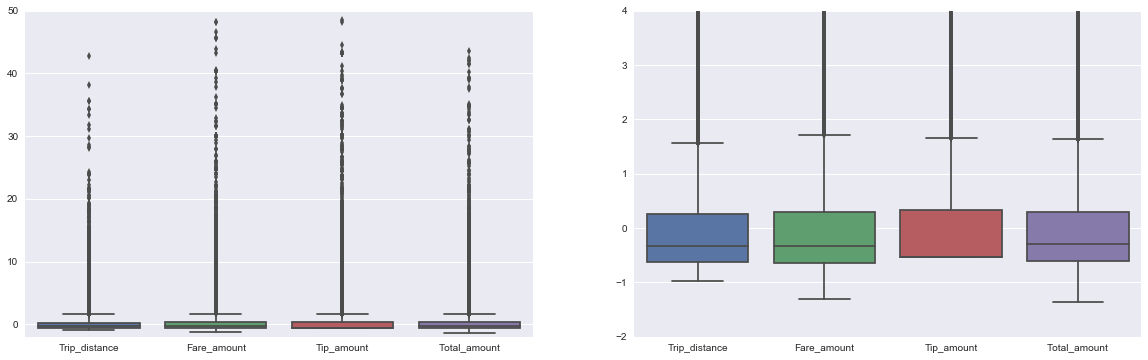

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(model_taxiData.drop(['lpep_pickup_datetime','Lpep_dropoff_datetime'],axis=1))
scaled_features = scaler.transform(model_taxiData.drop(['lpep_pickup_datetime','Lpep_dropoff_datetime'],axis=1))
a = pd.DataFrame(scaled_features, columns=model_taxiData.drop(['lpep_pickup_datetime','Lpep_dropoff_datetime'], axis=1).columns)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.ylim(-2,50)
sns.boxplot(data=a[['Trip_distance','Fare_amount','Tip_amount','Total_amount']])
plt.subplot(1,2,2)
plt.ylim(-2,4)
sns.boxplot(data=a[['Trip_distance','Fare_amount','Tip_amount','Total_amount']])



In [24]:
model_taxiData = model_taxiData[((model_taxiData.Trip_distance - model_taxiData.Trip_distance.mean()) / model_taxiData.Trip_distance.std()).abs() < 3]
model_taxiData = model_taxiData[((model_taxiData.Fare_amount - model_taxiData.Fare_amount.mean()) / model_taxiData.Fare_amount.std()).abs() < 3]
model_taxiData = model_taxiData[((model_taxiData.Tip_amount - model_taxiData.Tip_amount.mean()) / model_taxiData.Tip_amount.std()).abs() < 3]
print('After dealing with outliers ( greater than 3 standard deviations away ) in Trip Distance, Fare Amount, Tip Amount we are left with ', model_taxiData.shape[0] ,' rows of data' )
print('We now have ', model_taxiData.shape[0]/rows*100, ' % of the original data left' )



After dealing with outliers ( greater than 3 standard deviations away ) in Trip Distance, Fare Amount, Tip Amount we are left with  1408671  rows of data
We now have  94.23014918464192  % of the original data left


#### FEATURE ENGINEERING

In [25]:
#Feature Engineering
model_taxiData['Tip_percent'] = model_taxiData.Tip_amount/model_taxiData.Total_amount*100
model_taxiData['lpep_pickup_datetime'] = pd.to_datetime(model_taxiData['lpep_pickup_datetime'])
model_taxiData['Lpep_dropoff_datetime'] = pd.to_datetime(model_taxiData['Lpep_dropoff_datetime'])
model_taxiData['hour_of_pickup'] = model_taxiData['lpep_pickup_datetime'].apply(lambda x: x.hour)
model_taxiData['day_of_pickup'] = model_taxiData['lpep_pickup_datetime'].apply(lambda x: x.dayofweek)
#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#model_taxiData['day_of_pickup'] = model_taxiData['day_of_pickup'].map(dmap)
model_taxiData['week_number'] = model_taxiData['lpep_pickup_datetime'].apply(lambda x: x.day)
model_taxiData['week_number'] = model_taxiData['week_number'].apply(lambda x: (x-1)//7 + 1)

model_taxiData['trip_duration'] = (model_taxiData.Lpep_dropoff_datetime - model_taxiData.lpep_pickup_datetime).apply(lambda x: x.total_seconds()/60)
model_taxiData['trip_duration'] = model_taxiData[model_taxiData['trip_duration']>0]
model_taxiData['trip_duration'] = pd.to_numeric(model_taxiData['trip_duration'])
model_taxiData['speed'] = model_taxiData.Trip_distance / model_taxiData.trip_duration
model_taxiData['tip'] = model_taxiData['Tip_percent'].apply(lambda x: 1 if x>0 else 0)
print('After the process of feature engineering, we now have ',model_taxiData.shape[1],' features in our new transformed dataset')

After the process of feature engineering, we now have  26  features in our new transformed dataset


#### DATA EXPLORATION

Within this stage of data exploration, we will perform some basic tests and visualizations in order to explore the dataset and to decide which variables we should make use of while trying to model the tip percentage. Firstly, I created a correlation plot for the continous varialbles within the dataset model_taxiData. As we can see below, we can notice high correlation between some features like speed and trip_distance and high negative correlation between speed and trip_duration. This can be explained due to the fact that speed is a derived variable from the two variables. As a result, while creating the model we must be careful of not using all these variables together as it might lead to multicolinearity. Such a correlation plot is very helpful in such situations. 

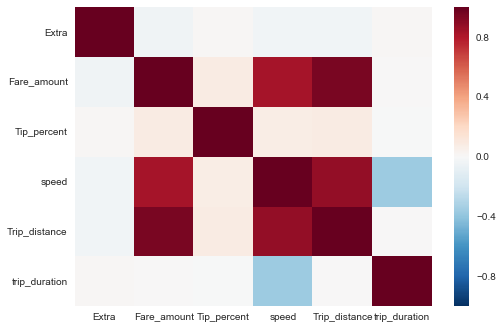

In [26]:
sns.heatmap(data=model_taxiData[['Extra','Fare_amount','Tip_percent','speed','Trip_distance','trip_duration']].corr())

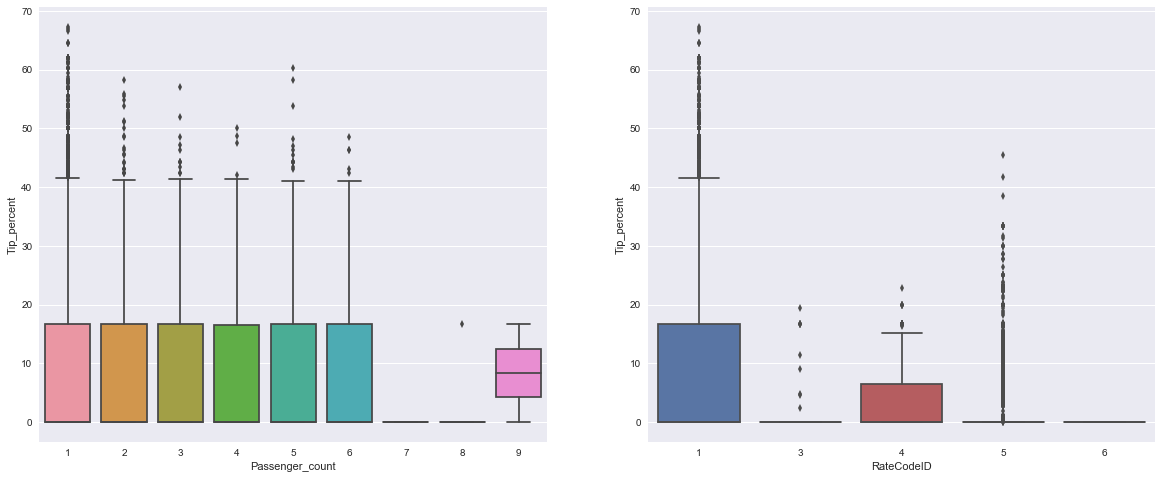

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x='Passenger_count', y='Tip_percent', data=model_taxiData)
plt.subplot(1,2,2)
sns.boxplot(x='RateCodeID', y='Tip_percent', data=model_taxiData)


Further exploration of some of the features like Passenger count and RateCodeID, give us some more insight into the data like Passenger count is not affecting the tip percentage in a noticable manner, however for lower passenger counts we are able to see the presence of much more outliers, which decreases as the the passenger count increases. Also, The boxplot on the right, showing RatecodeID against the tip percentage shows us that trips which are aiport trips from/to JFK have completely vanished form our dataset after the data cleaning process which involved removing outlier values. This can be attributed to the fact that the number of trips with ratecode ID 1 are much greater in number and are hence influencing the values much more, causing the data points for JFK to be treated as outliers. 
This can be studied in more depth at a leter point, however due to time constraints I am not exploring the reasons for this right now. 

#### MODELLING

The next step in this process will be of utilizing machine learning algorithms in order to determine thee tip percentage. In order to acheive this, I shall be using a two step approach. The first step will be just determining whether the customer will actually tip the taxi driver or not. The second stage will be to determine how much tip percentage would the customer actually give. The first issue of whether the customer will tip or not seems to be a simple classification problem, for which we can choose from various classification alogrithms like logistic regression, K nearest neighbors or even random forests. Since the data size is around 1.5 million rows with 24 features I would be more inclined to use either of KNN or Random Forests. I will be applying both of them in order to determine which one of the lot is a better fit for this problem. 

In [28]:
from scipy.stats import ttest_ind
with_tip = model_taxiData[model_taxiData['tip']==1]
no_tip = model_taxiData[model_taxiData['tip']==0]
speed_test = ttest_ind(with_tip['speed'], no_tip['speed'], nan_policy='omit')
print('For a t-test for Speed, we are able to distinguish between Tip and Non-Tip rides. The P-Value is:',speed_test[1],'The t-statistic is:',speed_test[0])
fare_amount_test = ttest_ind(with_tip['Fare_amount'], no_tip['Fare_amount'], nan_policy='omit')
print('For a t-test for Fare Amount, we are able to distinguish between Tip and Non-Tip rides. The P-Value is:',fare_amount_test[1],'The t-statistic is:',fare_amount_test[0])
trip_duration_test = ttest_ind(with_tip['trip_duration'], no_tip['trip_duration'], nan_policy='omit')
print('For a t-test for Trip Duration, we are able to distinguish between Tip and Non-Tip rides. The P-Value is:',trip_duration_test[1],'The t-statistic is:',trip_duration_test[0])
trip_distance_test = ttest_ind(with_tip['Trip_distance'], no_tip['Trip_distance'], nan_policy='omit')
print('For a t-test for Trip Distance, we are able to distinguish between Tip and Non-Tip rides. The P-Value is:',trip_distance_test[1],'The t-statistic is:',trip_distance_test[0])

For a t-test for Speed, we are able to distinguish between Tip and Non-Tip rides. The P-Value is: 0.0 The t-statistic is: 152.835698625
For a t-test for Fare Amount, we are able to distinguish between Tip and Non-Tip rides. The P-Value is: 0.0 The t-statistic is: 173.754583397
For a t-test for Trip Duration, we are able to distinguish between Tip and Non-Tip rides. The P-Value is: 8.32308803475e-46 The t-statistic is: -14.207233776
For a t-test for Trip Distance, we are able to distinguish between Tip and Non-Tip rides. The P-Value is: 0.0 The t-statistic is: 164.575337702


#### CLASSIFICATION

The first step for KNN will be to drop some features like lpep_pickup_datetime and Lpep_dropoff_datetime as I have already extracted the information i felt was useful from them. Also, I will be dropping the varianle Store_and_fwd_flag from this dataset. I feel like for this problem I should also split features like day_of_pickup, rate_code_ID, payment_type and trip_type into binary outcomes as they are all categorical variables. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
model_taxiData.dropna(axis=0, inplace=True)
#UNCOMMENT THE FOLLOWING THREE LINES IF YOU WANT TO FIT THE MODEL TO A SMAPLE OF THE DATASET
model_taxiData1 = model_taxiData.sample(n=250000)
X = model_taxiData1[['Trip_distance','Total_amount','Payment_type','trip_duration','hour_of_pickup','day_of_pickup','week_number','speed','Tolls_amount','Extra','MTA_tax']]
y = model_taxiData1['tip']

#UNCOMMENT THE FOLLOWING TWO LINES IF YOU WANT TO FIT THE MODEL TO THE ENTIRE DATASET
#X = model_taxiData[['Passenger_count','Trip_distance','Total_amount','Payment_type','trip_duration','hour_of_pickup','day_of_pickup','week_number','speed','Tolls_amount','Extra','MTA_tax']]
#y = model_taxiData['tip']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
param_grid = {'n_estimators': [110, 120, 130, 140, 150], 'oob_score': [True]} 
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=1)
rf_fit = grid.fit(X_train,y_train)
pred = grid.predict(X_test)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  4.0min finished


The above model takes around <b>3.5 minutes</b> to optimize, with a <b>250,000 sample</b> of rows from the dataset. If you wish to speed up the process, you can reduce the sample size to 100,000. 

Now that the random forest classifier has been fit to the dataset and the predictions have been made, we see that we have used GridSearch instead of simply specifying the parameters for the random forest model. This is done in order to optimize the model so that we are able to find the best fit parameters from a given range of parameters. I have decided to only chose the number of classifier / the number of trees needed to make the 'forest'. We see from the data being fit that <b>130</b> trees are the optimum number of trees needed for this model. 

Also, there are a couple of options we have in order to fit the data, to the model. If we decide to use the entire dataset to train and test the model, we have a lot of observations to perform the task. This results in a long time being taken to create the model using GridSearch. In case the there is a time constraint, we can make use of a sample of data to train and test the random forest model. 

<b><u>NOTE:</b></u> In the above code, if you wish to use a sample of the original dataset, you will have to uncomment the first set of lines which make use of the smaple function to make sure we get a random set of samples. The number of samples you wish to take can be specified within the n parameter in the sample function. If you do decide to use the entire data, you will need to uncomment out the set of lines below it, to make sure that there are no errors. 

Due to time constraints, I have decided not to try to tune other parameters like max_features, oob_score etc, as it will lead to a great increase in the number of fits which will have to performed on the dataset. 

Below, I have used some metrics available within the sklearn.metrics package to evaluate a classification model. The metrics I amke use of are <b>confusion matrix, classification report</b> and the <b>AUC</b>.

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.95      0.97     45166
          1       0.93      0.97      0.95     29834

avg / total       0.96      0.96      0.96     75000

AUC: 0.960950481222


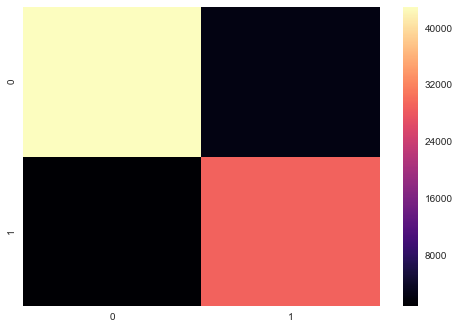

In [30]:
sns.heatmap(data=confusion_matrix(y_test, pred), cmap='magma')
print('Classification Report:')
print(classification_report(y_test, pred))

from sklearn.metrics import roc_auc_score
print('AUC:', roc_auc_score(y_test, pred))

From the above metrics we can conclude that the model which we have created is a good fit, considering the high values of Precision & Recall for both the classifiers 0 and 1. Even the AUC is almost <b>96%</b> which is represents a good fit. Even from the heatmap generated from the confusion matrix we can see that the predictions being perfromed are of a good quality. 

In [31]:
#x = rf_fit.
#y_pos = np.arange(len(x))
#plt.figure(figsize=(6,4))
#plt.bar(y_pos, x) 
#plt.xticks(y_pos, X_test.columns, rotation='vertical')
# While training model, take care of illogical tip&fare amount combinations



#### REGRESSION

Now that we have created a model to determine which values are indeed going to give a tip or not, using the reandom forests classification algorithm we will move onto the next stage of modelling. This will include using a regression algorithm in order to determine how much tip will the customer actually give now that we have accertained that the customer will give a tip.

Just as in the case of the previous stage where we chose from various classification models, over here we will be chosing from various regression models like linear regression, random forests regressor etc. However, for this model I'll be using Random Forests again, however this time I'll be using the Random Forest Regressor. 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model_taxiData.dropna(axis=0, inplace=True)

regressor_model_taxiData = model_taxiData[model_taxiData['tip']==1]
#UNCOMMENT THE FOLLOWING TWO LINES IF YOU WANT TO FIT THE MODEL TO THE ENTIRE DATASET
#X = regressor_model_taxiData[['Total_amount','trip_duration','speed','Tolls_amount','Passenger_count','hour_of_pickup','day_of_pickup']]
#y = regressor_model_taxiData['Tip_percent']

#UNCOMMENT THE FOLLOWING THREE LINES IF YOU WANT TO FIT THE MODEL TO A SMAPLE OF THE DATASET
regressor_model_taxiData1 = regressor_model_taxiData.sample(n=250000)
X = regressor_model_taxiData1[['Total_amount','trip_duration','speed','Tolls_amount','Passenger_count','hour_of_pickup','day_of_pickup']]
y = regressor_model_taxiData1['Tip_percent']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
rparam_grid = {'n_estimators': [110, 120, 130, 140, 150], 'oob_score': [True]} 
rgrid = GridSearchCV(RandomForestRegressor(),rparam_grid,refit=True, verbose=1)
rgrid.fit(X_train, y_train)
predi = rgrid.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,predi))
print('Mean Squared Error:',mean_squared_error(y_test,predi))
r2 = r2_score(y_test,predi)
print('R-squared:',r2)
if (r2 > 0.5) & (r2 < 0.75):
    print('Good Fit!, but could be better')
elif r2 >= 0.75:
    print('Great Fit!')
else:
    print('Got to try harder!')


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  8.8min finished


Mean Absolute Error: 1.34298063405
Mean Squared Error: 9.0661723188
R-squared: 0.544836501789
Good Fit!, but could be better


The above model takes around <b>9 minutes</b> to optimize, with a <b>350,000 sample</b> of rows from the dataset. If you wish to speed up the process, you can reduce the sample size to 100,000. 

<b><u>NOTE:</b></u> In the above code, if you wish to use a sample of the original dataset, you will have to uncomment the second set of lines which make use of the smaple function to make sure we get a random set of samples. The number of samples you wish to take can be specified within the n parameter in the sample function. If you do decide to chose to sample the data, you will need to uncomment out the first set of lines, to make sure that there are no errors. 

Due to time constraints, I have decided not to try to tune other parameters like max_features, oob_score etc, as it will lead to a great increase in the number of fits which will have to performed on the dataset. I feel we can achieve better results by tuning other parameters of this random forest model.

Above, I have also used some metrics like Mean Absolute Error, Mean Squared Error and the R Sqaured value to evaluate the Regressor model which has been created. From the given metrics the model seems like a good fit, however there is  scope for improvement by tweaking the features being considered, n_estimators, max_features etc. This has not been perfromed due to time constraints, as it would take a huge amount of time to perform such combinations on the entire dataset. 


# Recommendations

<ol>
<li>Passenger Count values which are zero can be imputed using KNN Imputation in a fashion similar to the following code. This was however not performed currently due to computational constraints. While we can also perform mean or median imputation, the most appropritte method of imputation in this case is KNN as it will include all the factors while performing its predictions for the passenger count. Currently there were only 92 rows of data with a 0 passenger count, this accounted for 0.006% of the data, as a result of which I chose to drop them. However, it is worth noting that these rows have valid values for trip_distance, fare_amount etc. and the 0 count is probably a data entry.

In [33]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
#scaler = StandardScaler()
#model_taxiData_passenger = model_taxiData[model_taxiData['Passenger_count']>0]
#scaler.fit(model_taxiData_passenger.drop(['Passenger_count','Store_and_fwd_flag','lpep_pickup_datetime','Lpep_dropoff_datetime'],axis=1))
#scaled_features = scaler.transform(model_taxiData_passenger.drop(['Passenger_count','Store_and_fwd_flag','lpep_pickup_datetime','Lpep_dropoff_datetime'],axis=1))
#X_train, X_test, y_train, y_test = train_test_split(scaled_features,model_taxiData_passenger['Passenger_count'],test_size=0.30)
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train,y_train)
#pred = knn.predict(X_test)

<ol start=2> 
<li>We can fine tune both the random forests models being created and fit to the classification and the regression problem in the above model. This can be done by specifying more options within the grid search params map. This is however an extremely time intensive process due to the size of data and features involved. 
<li>We can integrate more data into the model to ensure that we get a fair representation of lesser occuring data and to ensure it is not a one off trend just for the month of september. 

## 5.A DISTRIBUTIONS

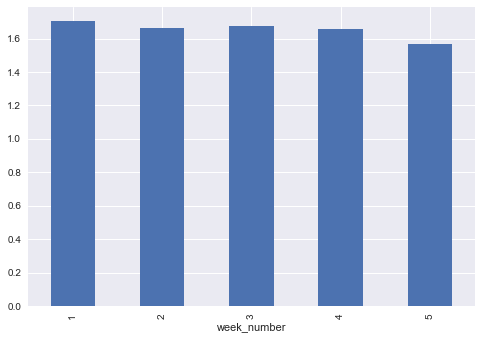

In [34]:
taxiData['week_number'] = taxiData['lpep_pickup_datetime'].apply(lambda x: x.day)
taxiData['week_number'] = taxiData['week_number'].apply(lambda x: (x-1)//7 + 1)
taxiData.groupby('week_number').mean().speed.plot(kind='bar') 

In [35]:
#taxiData['speed'] = taxiData.Trip_distance / taxiData.trip_duration#taxiData['Avg_speed'] = taxiData.Trip_distance/taxiData.Trip
from scipy.stats import ttest_ind
#t-test
week1 = taxiData[taxiData['week_number']==1]['speed']
week2 = taxiData[taxiData['week_number']==2]['speed']
week3 = taxiData[taxiData['week_number']==3]['speed']
week4 = taxiData[taxiData['week_number']==4]['speed']
week5 = taxiData[taxiData['week_number']==5]['speed']
t_12 = ttest_ind(week1, week2, nan_policy='omit')
t_13 = ttest_ind(week1, week3, nan_policy='omit')
t_14 = ttest_ind(week1, week4, nan_policy='omit')
t_15 = ttest_ind(week1, week5, nan_policy='omit')
t_23 = ttest_ind(week2, week3, nan_policy='omit')
t_24 = ttest_ind(week2, week4, nan_policy='omit')
t_25 = ttest_ind(week2, week5, nan_policy='omit')
t_34 = ttest_ind(week3, week4, nan_policy='omit')
t_35 = ttest_ind(week3, week5, nan_policy='omit')
t_45 = ttest_ind(week4, week5, nan_policy='omit')

def null_values(x):
    if x[1]<0.05:
        print('Acceptable!')
    else:
        print('Null Hypothesis CANNOT be rejected at 95% CI')
        
print('-----------------------------------------------')
print('Week 1 & Week 2')
null_values(t_12)
print('T-Statistic:',t_12[0],'& P-Value:',t_12[1])
print('-----------------------------------------------')
print('Week 1 & Week 3')
null_values(t_13)
print('T-Statistic:',t_13[0],'& P-Value:',t_13[1])
print('-----------------------------------------------')
print('Week 1 & Week 4')
null_values(t_14)
print('T-Statistic:',t_14[0],'& P-Value:',t_14[1])
print('-----------------------------------------------')
print('Week 1 & Week 5')
null_values(t_15)
print('T-Statistic:',t_15[0],'& P-Value:',t_15[1])
print('-----------------------------------------------')
print('Week 2 & Week 3')
null_values(t_23)
print('T-Statistic:',t_23[0],'& P-Value:',t_23[1])
print('-----------------------------------------------')
print('Week 2 & Week 4')
null_values(t_24)
print('T-Statistic:',t_24[0],'& P-Value:',t_24[1])
print('-----------------------------------------------')
print('Week 2 & Week 5')
null_values(t_25)
print('T-Statistic:',t_25[0],'& P-Value:',t_25[1])
print('-----------------------------------------------')
print('Week 3 & Week 4')
null_values(t_34)
print('T-Statistic:',t_34[0],'& P-Value:',t_34[1])
print('-----------------------------------------------')
print('Week 3 & Week 5')
null_values(t_35)
print('T-Statistic:',t_35[0],'& P-Value:',t_35[1])
print('-----------------------------------------------')
print('Week 4 & Week 5')
null_values(t_45)
print('T-Statistic:',t_45[0],'& P-Value:',t_45[1])

-----------------------------------------------
Week 1 & Week 2
Acceptable!
T-Statistic: 10.3436829501 & P-Value: 4.4894874014e-25
-----------------------------------------------
Week 1 & Week 3
Acceptable!
T-Statistic: 7.35775900105 & P-Value: 1.87232535671e-13
-----------------------------------------------
Week 1 & Week 4
Acceptable!
T-Statistic: 10.7602739122 & P-Value: 5.32887754596e-27
-----------------------------------------------
Week 1 & Week 5
Acceptable!
T-Statistic: 22.4420594398 & P-Value: 1.7829018529e-111
-----------------------------------------------
Week 2 & Week 3
Acceptable!
T-Statistic: -3.10269948952 & P-Value: 0.00191771892172
-----------------------------------------------
Week 2 & Week 4
Null Hypothesis CANNOT be rejected at 95% CI
T-Statistic: 0.547509957835 & P-Value: 0.584028612249
-----------------------------------------------
Week 2 & Week 5
Acceptable!
T-Statistic: 16.1208232065 & P-Value: 1.89415288743e-58
----------------------------------------------

On performing a very basic two sided T-test on pairs of weeks, we observe one anomoly of week 2 and week 4 whose null hypothesis cannot be rejected within a 95% confidence interval due to a high p-value. Other than that, based upon this test we would be able to identify weeks independently absed on their average speeds. 

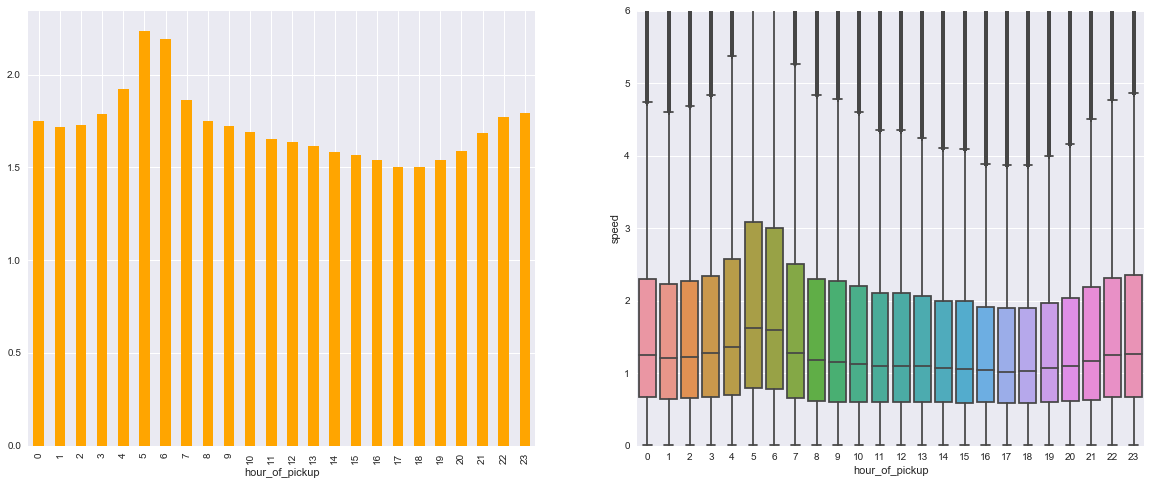

In [36]:
#taxiData.groupby('hour_of_pickup').mean().speed.plot(kind='bar', color='orange')
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
sns.boxplot(x='hour_of_pickup', y='speed', data = taxiData)
plt.ylim(0,6)
plt.subplot(1,2,1)
taxiData.groupby('hour_of_pickup').mean().speed.plot(kind='bar', color='orange')

From the above visualizations for the avg trip speed vs the hour_of_pickup, we can see that the average trip speed increases around 5:00am to 6:00 am and then gradually decreases, increasing again starting from 6:00 pm. This is evident from both the bar plot on the left side as well the the boxplot representing the hour wise speed on the right side. 

# PREDICT USING NEW DATASET FOR TIP PERCENTAGE

Here, im making use of the Green Taxi Data for October 2015 in order to evaluate the performance of the model created in previous steps. 

In [41]:
model_testData = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-10.csv')
print('Data is sucecssfully loaded into variable model_testData!')
rows = model_testData.shape[0]
print('The Data loaded has ', model_testData.shape[0] ,' rows of data & ' , model_testData.shape[1] , ' features in it.')

#Data Cleaning
model_testData.drop(['Ehail_fee','Store_and_fwd_flag'], axis=1, inplace=True)
model_testData['Fare_amount'] = model_testData['Fare_amount'].apply(lambda x: abs(x))
model_testData['Extra'] = model_testData['Extra'].apply(lambda x: abs(x))
model_testData['MTA_tax'] = model_testData['MTA_tax'].apply(lambda x: abs(x))
model_testData['Tip_amount'] = model_testData['Tip_amount'].apply(lambda x: abs(x))
model_testData['Tolls_amount'] = model_testData['Tolls_amount'].apply(lambda x: abs(x))
model_testData['improvement_surcharge'] = model_testData['improvement_surcharge'].apply(lambda x: abs(x))
model_testData['Total_amount'] = model_testData['Total_amount'].apply(lambda x: abs(x))
model_testData.dropna(axis=0, inplace=True)
print('We now have ', model_testData.shape[0]/rows*100, ' % of the data left, after initial data cleaning' )


'''model_testData = model_testData[((model_testData.Trip_distance - model_testData.Trip_distance.mean()) / model_testData.Trip_distance.std()).abs() < 3]
model_testData = model_testData[((model_testData.Fare_amount - model_testData.Fare_amount.mean()) / model_testData.Fare_amount.std()).abs() < 3]
model_testData = model_testData[((model_testData.Tip_amount - model_testData.Tip_amount.mean()) / model_testData.Tip_amount.std()).abs() < 3]
print('After dealing with outliers ( greater than 3 standard deviations away ) in Trip Distance, Fare Amount, Tip Amount we are left with ', model_testData.shape[0] ,' rows of data' )
print('We now have ', model_testData.shape[0]/rows*100, ' % of the original data left' )'''



#Feature Engineering
model_testData['Tip_percent'] = model_testData.Tip_amount/model_testData.Total_amount*100
model_testData['lpep_pickup_datetime'] = pd.to_datetime(model_testData['lpep_pickup_datetime'])
model_testData['Lpep_dropoff_datetime'] = pd.to_datetime(model_testData['Lpep_dropoff_datetime'])
model_testData['hour_of_pickup'] = model_testData['lpep_pickup_datetime'].apply(lambda x: x.hour)
model_testData['day_of_pickup'] = model_testData['lpep_pickup_datetime'].apply(lambda x: x.dayofweek)
#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#model_testData['day_of_pickup'] = model_testData['day_of_pickup'].map(dmap)
model_testData['week_number'] = model_testData['lpep_pickup_datetime'].apply(lambda x: x.day)
model_testData['week_number'] = model_testData['week_number'].apply(lambda x: (x-1)//7 + 1)

model_testData['trip_duration'] = (model_testData.Lpep_dropoff_datetime - model_testData.lpep_pickup_datetime).apply(lambda x: x.total_seconds()/60)
model_testData['trip_duration'] = model_testData[model_testData['trip_duration']>0]
model_testData['trip_duration'] = pd.to_numeric(model_testData['trip_duration'])
model_testData['speed'] = model_testData.Trip_distance / model_testData.trip_duration
model_testData['tip'] = model_testData['Tip_percent'].apply(lambda x: 1 if x>0 else 0)
print('After the process of feature engineering, we now have ',model_testData.shape[1],' features in our new transformed dataset')

model_testData.dropna(axis=0, inplace=True)
#UNCOMMENT THE FOLLOWING LINE IF YOU WANT TO PREDICT USING A SMAPLE OF THE LOADED DATASET
model_testData = model_testData.sample(n=100000)

X_test = model_testData[['Trip_distance','Total_amount','Payment_type','trip_duration','hour_of_pickup','day_of_pickup','week_number','speed','Tolls_amount','Extra','MTA_tax']]
y_test = model_testData['tip']


# Predict using the Classification model created. 
pred = grid.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, pred))

#from sklearn.metrics import roc_auc_score
print('AUC:', roc_auc_score(y_test, pred))

model_testData.dropna(axis=0, inplace=True)

#IF USING A SUBSET OF THE ENTIRE DATASET
model_testData['tip'] = pred
regressor_model_testData = model_testData[model_testData['tip']==1]
#IF USING THE ENTIRE DATASET
#regressor_model_testData = model_testData[model_testData['tip']==1]

X_test = regressor_model_testData[['Total_amount','trip_duration','speed','Tolls_amount','Passenger_count','hour_of_pickup','day_of_pickup']]
y_test = regressor_model_testData['Tip_percent']

predi = rgrid.predict(X_test)

print('Mean Absolute Error:',mean_absolute_error(y_test,predi))
print('Mean Squared Error:',mean_squared_error(y_test,predi))
r2 = r2_score(y_test,predi)
print('R-squared:',r2)
if (r2 > 0.5) & (r2 < 0.75):
    print('Good Fit!, but could be better')
elif r2 >= 0.75:
    print('Great Fit!')
else:
    print('Got to try harder!')




Data is sucecssfully loaded into variable model_testData!
The Data loaded has  1630536  rows of data &  21  features in it.
We now have  99.99969335237002  % of the data left, after initial data cleaning
After the process of feature engineering, we now have  26  features in our new transformed dataset
Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.94      0.96     58115
          1       0.92      0.97      0.95     41885

avg / total       0.96      0.96      0.96    100000

AUC: 0.957635934875
Mean Absolute Error: 2.51766095875
Mean Squared Error: 30.4610468777
R-squared: 0.336102177903
Got to try harder!
